# Final Year Dissertation Project

## Loading Data

In [1]:
# Import pandas
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression

In [2]:
#load data from Excel File
filename = 'C:/Users/asus/OneDrive - University of Plymouth/Sem 3/PROJ518 MSc Dissertation and Research Skills/OA Compliance Report All Plymouth 2021-23.xlsx'
df = pd.read_excel(filename)

In [3]:
df

,Publication ID,Publication Type,Primary Group,OA Compliance,OA Compliance Issue - Embargo exceeds maximum,OA Compliance Issue - Item not live,OA Compliance Issue - Missed deposit deadline,OA Compliance Issue - Missing effective date,OA Compliance Issue - Missing effective date - could not determine deposit deadline,OA Compliance Issue - Missing publication date - could not determine embargo period,...,OA Policy Exception - Deposit2,OA Policy Exception - Deposit3,OA Policy Exception - Deposit4,OA Policy Exception - Deposit5,OA Policy Exception - Deposit6,OA Policy Exception - Deposit7,OA Policy Exception - DoNotRequest,OA Policy Exception - Other,OA Policy Exception - Tech1,OA Policy Exception - Tech2
0,592307,Journal article,"Faculty of Arts, Humanities and Business",Compliant,False,False,False,False,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,604493,Journal article,"Faculty of Arts, Humanities and Business",Compliant,False,False,False,False,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,559156,Journal article,"Faculty of Arts, Humanities and Business",Compliant,False,False,False,False,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,584272,Journal article,"Faculty of Arts, Humanities and Business",Non-compliant,False,False,False,False,True,False,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
4,587767,Journal article,"Faculty of Arts, Humanities and Business",Non-compliant,True,False,False,False,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3112,603404,Conference item,Faculty of Science and Engineering,Non-compliant,False,True,False,False,True,False,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3113,591794,Conference item,Faculty of Science and Engineering,Non-compliant,False,True,False,False,True,False,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3114,621910,Conference item,Faculty of Science and Engineering,Non-compliant,False,False,True,False,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
3115,634749,Journal article,Faculty of Science and Engineering,Compliant,False,False,False,False,False,False,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN


In [4]:
#checking data types
df.dtypes

Publication ID                                                                                  int64
Publication Type                                                                               object
Primary Group                                                                                  object
OA Compliance                                                                                  object
OA Compliance Issue - Embargo exceeds maximum                                                    bool
OA Compliance Issue - Item not live                                                              bool
OA Compliance Issue - Missed deposit deadline                                                    bool
OA Compliance Issue - Missing effective date                                                     bool
OA Compliance Issue - Missing effective date - could not determine deposit deadline              bool
OA Compliance Issue - Missing publication date - could not determine embargo perio

In [5]:
#checking if we have null values, becuase if we have data visualizations wont work
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3117 entries, 0 to 3116
Data columns (total 45 columns):
 #   Column                                                                               Non-Null Count  Dtype         
---  ------                                                                               --------------  -----         
 0   Publication ID                                                                       3117 non-null   int64         
 1   Publication Type                                                                     3117 non-null   object        
 2   Primary Group                                                                        3117 non-null   object        
 3   OA Compliance                                                                        3117 non-null   object        
 4   OA Compliance Issue - Embargo exceeds maximum                                        3117 non-null   bool          
 5   OA Compliance Issue - Item not live      

In [6]:
#since we have null values, im gonna fill the null values with the mean values or placeholder values instead of dropping the rows, 
#because it is better to fill it with mean or placeholders instead of dropping the rows

#resolving 1st issue - 
# Fill null values in the Repository item public URL column with the placeholder "Missing URL"
df['Repository item public URL'] = df['Repository item public URL'].fillna("Missing URL")

#resolving 2nd issue - 
#fill the null values in the First Deposit Date column with the median date:

# Calculate the median date
median_date = df['First Deposit Date'].median()

# Fill null values in the First Deposit Date column with the median date
df['First Deposit Date'] = df['First Deposit Date'].fillna(median_date)

#resolving 3rd issue
#fill the null values in the abstract column with the placeholder "No abstract available":

# Fill null values in the abstract column with the placeholder "No abstract available"
df['abstract'] = df['abstract'].fillna("No abstract available")

#resolving 4th issue
#fill the null values in the acceptance-date column with the median date:

# Calculate the median date
median_acceptance_date = df['acceptance-date'].median()

# Fill null values in the acceptance-date column with the median date
df['acceptance-date'] = df['acceptance-date'].fillna(median_acceptance_date)

#resolving 5th issue
#fill the null values in the doi column with the placeholder "No DOI available":

# Fill null values in the doi column with the placeholder "No DOI available"
df['doi'] = df['doi'].fillna("No DOI available")

#resolving 6th issue
#fill the null values in the journal column with the placeholder "No journal available":

# Fill null values in the journal column with the placeholder "No journal available"
df['journal'] = df['journal'].fillna("No journal available")

#resolving 7th issue
#fill the null values in the online-publication-date column with the median date:
#first we are converting the data datetime to timestamp so we can calculate the median, then will convert back and fill the null cells with median 
#values
# Convert 'online-publication-date' to datetime
df['online-publication-date'] = pd.to_datetime(df['online-publication-date'], errors='coerce')

# Convert to numeric values (timestamps)
timestamps = df['online-publication-date'].dropna().apply(pd.Timestamp.timestamp)

# Calculate the median of the timestamps
median_timestamp = timestamps.median()

# Convert the median timestamp back to a datetime object
median_online_publication_date = pd.to_datetime(median_timestamp, unit='s')

# Fill null values in the 'online-publication-date' column with the median date
df['online-publication-date'] = df['online-publication-date'].fillna(median_online_publication_date)

#resolving 8th issue 
#fill the null values in the pagination column with the placeholder "No pagination available":

# Fill null values in the pagination column with the placeholder "No pagination available"
df['pagination'] = df['pagination'].fillna("No pagination available")

#resolving 9th issue
#fill the null values in the publication-date column with the median date:
#first we are converting the data datetime to timestamp so we can calculate the median, then will convert back and fill the null cells with median values

# Convert 'publication-date' to datetime
df['publication-date'] = pd.to_datetime(df['publication-date'], errors='coerce')

# Convert to numeric values (timestamps)
timestamps = df['publication-date'].dropna().apply(pd.Timestamp.timestamp)

# Calculate the median of the timestamps
median_timestamp = timestamps.median()

# Convert the median timestamp back to a datetime object
median_publication_date = pd.to_datetime(median_timestamp, unit='s')

# Fill null values in the 'publication-date' column with the median date
df['publication-date'] = df['publication-date'].fillna(median_publication_date)

#resolving 10th issue
# Fill null values in the 'publication-status' and 'publisher' columns with the placeholder "Unknown"
df['publication-status'] = df['publication-status'].fillna("Unknown")
df['publisher'] = df['publisher'].fillna("Unknown")

#resolving 11th issue
# Fill null values in the volume column with '0'
df['volume'] = df['volume'].fillna(0)

# also making all numeric values, therefore non-numeric values to be appeared as NaN. Then we will resolve the NaN by replacing 0 to them.
# Convert 'volume' to numeric, coercing errors to NaN
df['volume'] = pd.to_numeric(df['volume'], errors='coerce')

# Fill NaN values in 'volume' with 0 (or you could use the mean, median, etc.)
df['volume'].fillna(0, inplace=True)

#resolving 12th issue
#i didnt resolve the OA Policy excelption cols becuase most of the cells are null. I will try data visualization with this data without cleaning them and only if the
#visualizations are not clear I will come back and resolve them
#update - leaving the empty cells as it is may cause errors, so im filling the missing values with '0'.
df['OA Policy Exception - Access1'] = df['OA Policy Exception - Access1'].fillna(0)
df['OA Policy Exception - Access2'] = df['OA Policy Exception - Access2'].fillna(0)
df['OA Policy Exception - Access3'] = df['OA Policy Exception - Access3'].fillna(0)
df['OA Policy Exception - Deposit1'] = df['OA Policy Exception - Deposit1'].fillna(0)
df['OA Policy Exception - Deposit2'] = df['OA Policy Exception - Deposit2'].fillna(0)
df['OA Policy Exception - Deposit3'] = df['OA Policy Exception - Deposit3'].fillna(0)
df['OA Policy Exception - Deposit4'] = df['OA Policy Exception - Deposit4'].fillna(0)
df['OA Policy Exception - Deposit5'] = df['OA Policy Exception - Deposit5'].fillna(0)
df['OA Policy Exception - Deposit6'] = df['OA Policy Exception - Deposit6'].fillna(0)
df['OA Policy Exception - Deposit7'] = df['OA Policy Exception - Deposit7'].fillna(0)
df['OA Policy Exception - DoNotRequest'] = df['OA Policy Exception - DoNotRequest'].fillna(0)
df['OA Policy Exception - Other'] = df['OA Policy Exception - Other'].fillna(0)
df['OA Policy Exception - Tech1'] = df['OA Policy Exception - Tech1'].fillna(0)
df['OA Policy Exception - Tech2'] = df['OA Policy Exception - Tech2'].fillna(0)

# Verify the changes
print("Checking 'volume' column for null values after filling with 0:")
print(df['volume'].isnull().sum())
print("Sample data from 'volume' column:")
print(df['volume'].head())

# Save the cleaned DataFrame to a new Excel file
cleaned_file_path = 'C:/Users/asus/OneDrive - University of Plymouth/Sem 3/PROJ518 MSc Dissertation and Research Skills/cleaned_dataset_1.csv'  # Update with your path
df.to_csv(cleaned_file_path, index=False)

df.info()

Checking 'volume' column for null values after filling with 0:
0
Sample data from 'volume' column:
0     30.0
1    306.0
2     67.0
3     19.0
4     21.0
Name: volume, dtype: float64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3117 entries, 0 to 3116
Data columns (total 45 columns):
 #   Column                                                                               Non-Null Count  Dtype         
---  ------                                                                               --------------  -----         
 0   Publication ID                                                                       3117 non-null   int64         
 1   Publication Type                                                                     3117 non-null   object        
 2   Primary Group                                                                        3117 non-null   object        
 3   OA Compliance                                                                        3117 non-null  

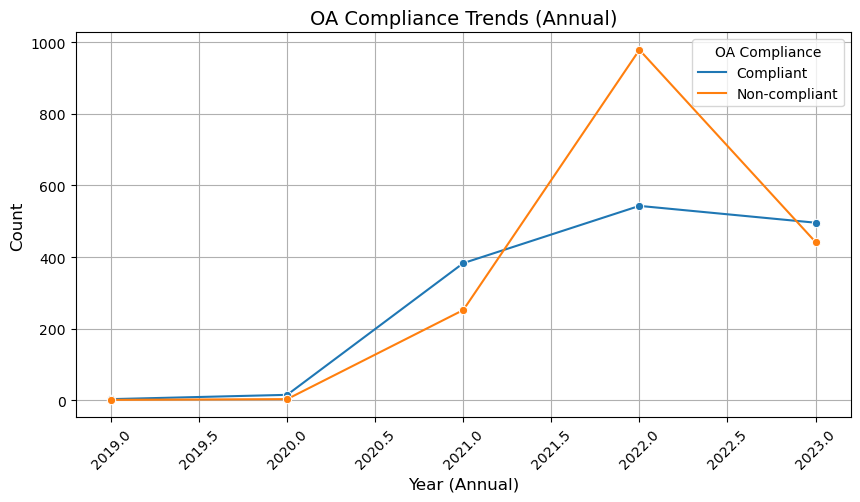

In [7]:
#The inline flag will use the appropriate backend to make figures appear inline in the notebook
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure 'First Deposit Date' is in datetime format
df['First Deposit Date'] = pd.to_datetime(df['First Deposit Date'], errors='coerce')

# Extract the year from 'First Deposit Date' without decimals
df['Year'] = df['First Deposit Date'].dt.year.astype(int)

# Aggregate the data by year and OA compliance status
df_agg = df.groupby(['Year', 'OA Compliance']).size().reset_index(name='Count')

# Plotting OA Compliance trends over time
plt.figure(figsize=(10, 5))
sns.lineplot(data=df_agg, x='Year', y='Count', hue='OA Compliance', marker='o')

# Updated title and labels
plt.title('OA Compliance Trends (Annual)', fontsize=14)
plt.xlabel('Year (Annual)', fontsize=12)  # Indicate the time frequency as annual
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability

# Include grid and legend
plt.grid(True)
plt.legend(title='OA Compliance')

# Save the plot as an image file before showing it
plt.savefig('OA_Compliance_Trends_Over_Years_Corrected.png', bbox_inches='tight')

plt.show()


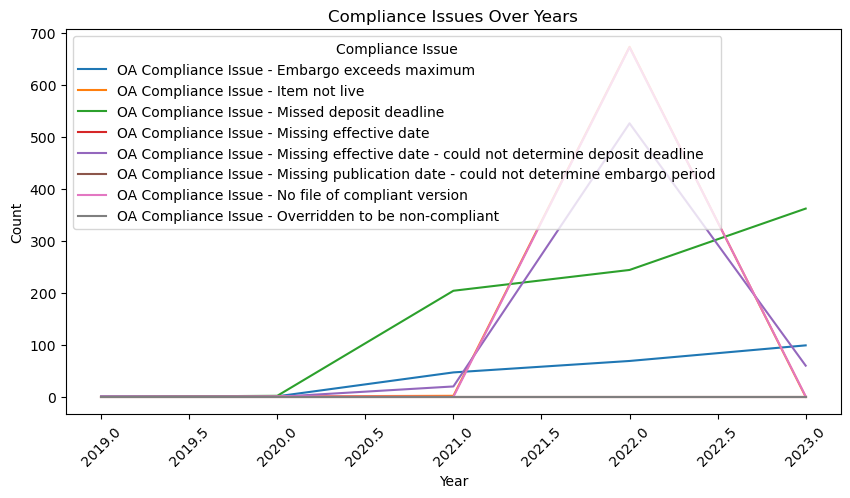

In [8]:
# Plot 1 - plotting Compliance Issues over time
# Aggregate data by year and compliance issues
compliance_issues = [
    'OA Compliance Issue - Embargo exceeds maximum',
    'OA Compliance Issue - Item not live',
    'OA Compliance Issue - Missed deposit deadline',
    'OA Compliance Issue - Missing effective date',
    'OA Compliance Issue - Missing effective date - could not determine deposit deadline',
    'OA Compliance Issue - Missing publication date - could not determine embargo period',
    'OA Compliance Issue - No file of compliant version',
    'OA Compliance Issue - Overridden to be non-compliant'
]
df_agg_issues = df.groupby('Year')[compliance_issues].sum().reset_index()
df_agg_issues = df_agg_issues.melt(id_vars='Year', var_name='Compliance Issue', value_name='Count')

# Plotting compliance issues over time
plt.figure(figsize=(10, 5))
sns.lineplot(data=df_agg_issues, x='Year', y='Count', hue='Compliance Issue')
plt.title('Compliance Issues Over Years')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend(title='Compliance Issue')
plt.xticks(rotation=45)

# Save the plot as an image file before showing it
plt.savefig('compliance_issues_Over_Years.png', bbox_inches='tight')

plt.show()


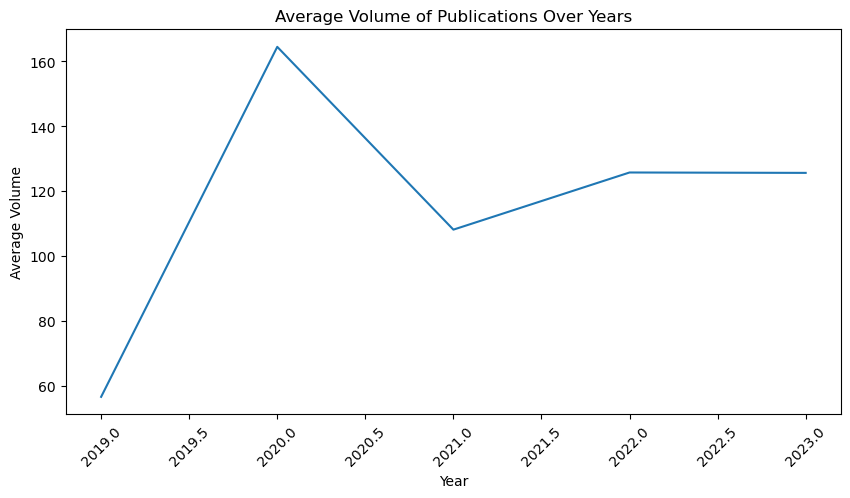

In [9]:
# Plot 3 - plotting average volume of publications over time
# Aggregate data by year and calculate average volume
df_agg_volume = df.groupby('Year')['volume'].mean().reset_index()

# Plotting average volume of publications over time
plt.figure(figsize=(10, 5))
sns.lineplot(data=df_agg_volume, x='Year', y='volume')
plt.title('Average Volume of Publications Over Years')
plt.xlabel('Year')
plt.ylabel('Average Volume')
plt.xticks(rotation=45)

# Save the plot as an image file before showing it
plt.savefig('average_volume_of_publications_over_years.png', bbox_inches='tight')

plt.show()


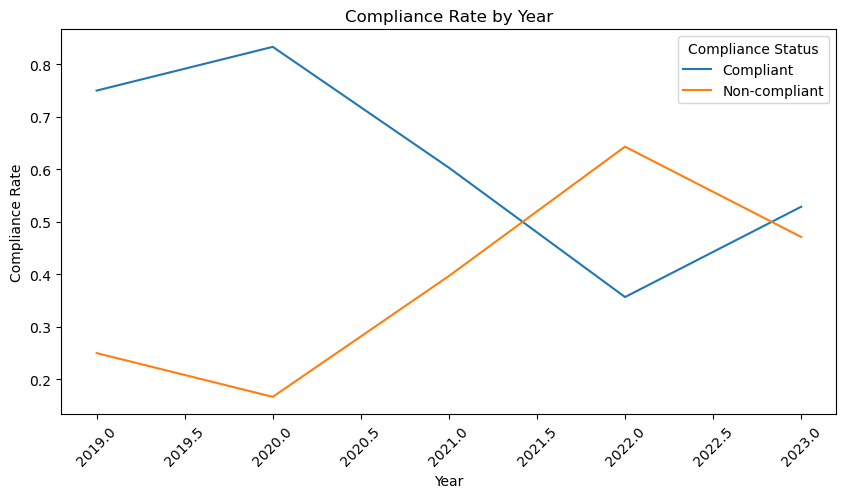

In [10]:
#Plot 4 - Compliance rate by year
# Calculate compliance rate by year
df_agg_compliance = df.groupby('Year')['OA Compliance'].value_counts(normalize=True).unstack().reset_index()

# Plotting compliance rate by year
plt.figure(figsize=(10, 5))
sns.lineplot(data=df_agg_compliance, x='Year', y='Compliant', label='Compliant')
sns.lineplot(data=df_agg_compliance, x='Year', y='Non-compliant', label='Non-compliant')
plt.title('Compliance Rate by Year')
plt.xlabel('Year')
plt.ylabel('Compliance Rate')
plt.legend(title='Compliance Status')
plt.xticks(rotation=45)

# Save the plot as an image file before showing it
plt.savefig('compliance_rate_Over_Years.png', bbox_inches='tight')
plt.show()


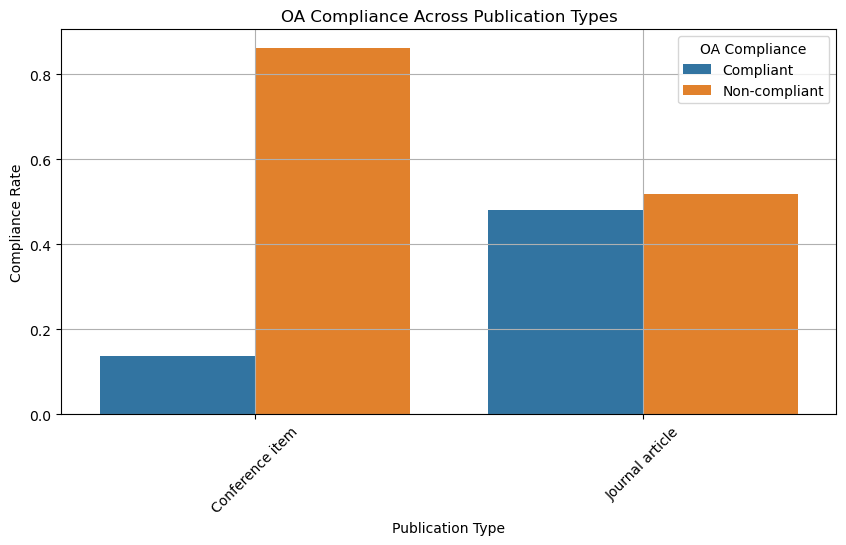

In [11]:
#Plot 5 - OA Compliance over publication Types
# Aggregate data by publication type and OA compliance status
df_agg_pub_type = df.groupby(['Publication Type', 'OA Compliance']).size().reset_index(name='Count')

# Normalize to get compliance rate within each publication type
df_agg_pub_type['Compliance Rate'] = df_agg_pub_type.groupby('Publication Type')['Count'].transform(lambda x: x / x.sum())

# Plotting OA Compliance across publication types
plt.figure(figsize=(10, 5))
sns.barplot(data=df_agg_pub_type, x='Publication Type', y='Compliance Rate', hue='OA Compliance')
plt.title('OA Compliance Across Publication Types')
plt.xlabel('Publication Type')
plt.ylabel('Compliance Rate')
plt.xticks(rotation=45)
plt.legend(title='OA Compliance')
plt.grid(True)

# Save the plot as an image file before showing it
plt.savefig('OA_Compliance_across_publication_types.png', bbox_inches='tight')

plt.show()


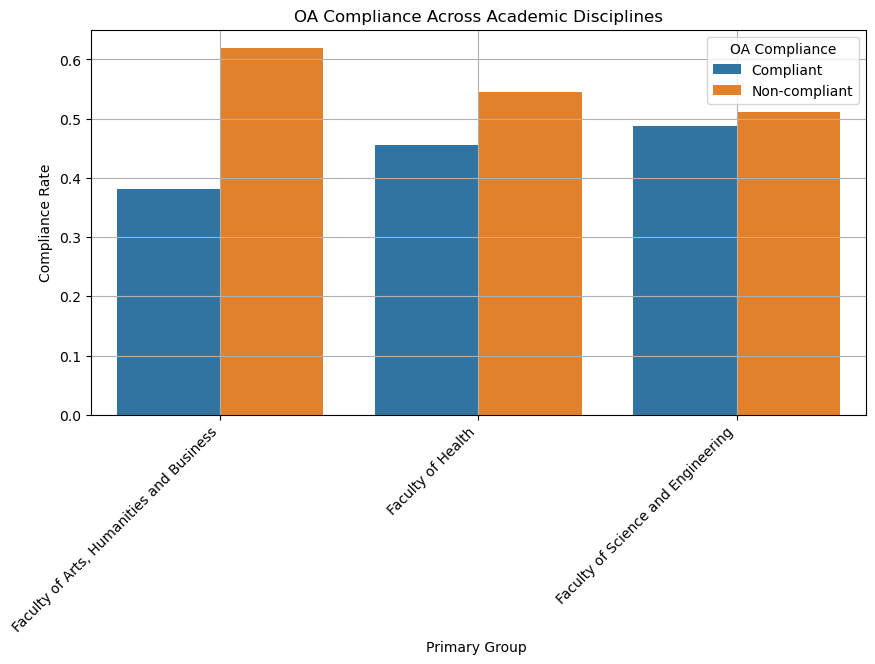

In [12]:
#Plot 6 - OA Compliance across academic disciplines
# Aggregate data by primary group and OA compliance status
df_agg_primary_group = df.groupby(['Primary Group ', 'OA Compliance']).size().reset_index(name='Count')

# Normalize to get compliance rate within each primary group
df_agg_primary_group['Compliance Rate'] = df_agg_primary_group.groupby('Primary Group ')['Count'].transform(lambda x: x / x.sum())

# Plotting OA Compliance across primary groups
plt.figure(figsize=(10, 5))
sns.barplot(data=df_agg_primary_group, x='Primary Group ', y='Compliance Rate', hue='OA Compliance')
plt.title('OA Compliance Across Academic Disciplines')
plt.xlabel('Primary Group ')
plt.ylabel('Compliance Rate')
plt.xticks(rotation=45, ha='right')
plt.legend(title='OA Compliance')
plt.grid(True)

# Save the plot as an image file before showing it
plt.savefig('OA_Compliance_across_academic_disciplines.png', bbox_inches='tight')
plt.show()


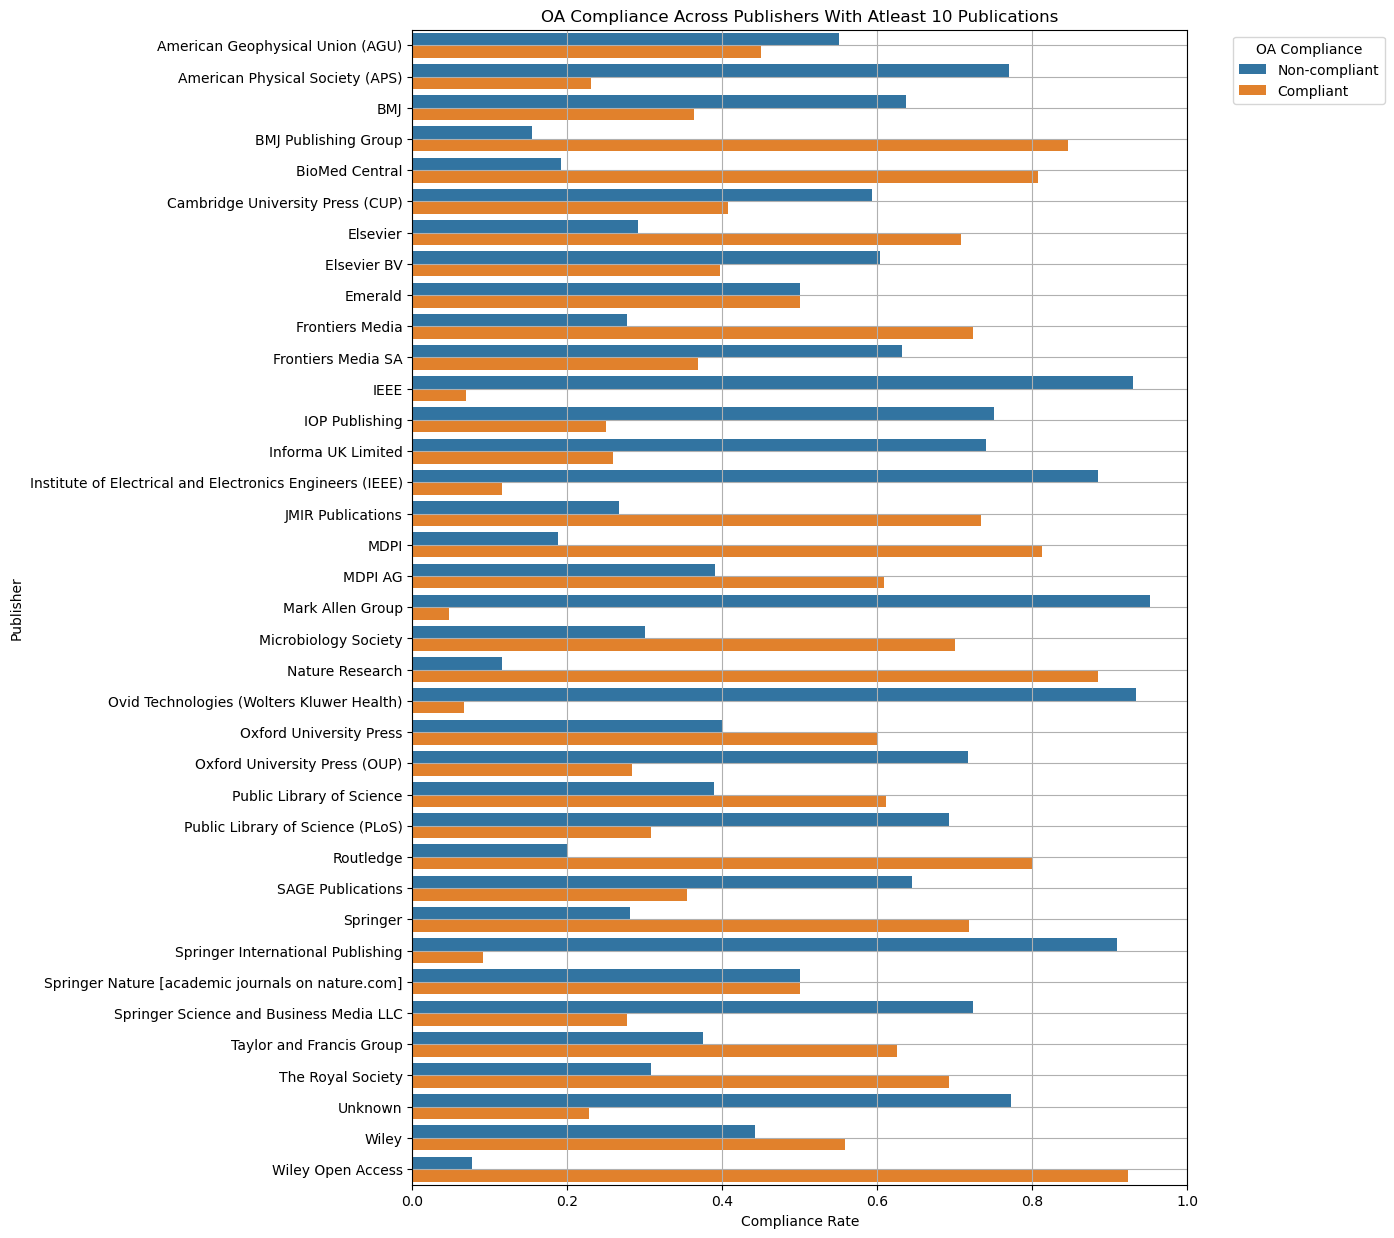

In [13]:
#Plot 7 - Publisher Compliance Rates

# Filter publishers with at least 10 publications
publisher_counts = df['publisher'].value_counts()
significant_publishers = publisher_counts[publisher_counts >= 10].index
df_filtered = df[df['publisher'].isin(significant_publishers)]

# Aggregate data by publisher and OA compliance status
df_agg_publisher = df_filtered.groupby(['publisher', 'OA Compliance']).size().reset_index(name='Count')

# Normalize to get compliance rate within each publisher
df_agg_publisher['Compliance Rate'] = df_agg_publisher.groupby('publisher')['Count'].transform(lambda x: x / x.sum())

# Sort the data by compliance rate
df_sorted = df_agg_publisher.sort_values(by=['publisher', 'Compliance Rate'], ascending=[True, False])

# Plotting OA Compliance across publishers
plt.figure(figsize=(10, 15))
sns.barplot(data=df_sorted, y='publisher', x='Compliance Rate', hue='OA Compliance')
plt.title('OA Compliance Across Publishers With Atleast 10 Publications')
plt.xlabel('Compliance Rate')
plt.ylabel('Publisher')
plt.legend(title='OA Compliance', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)

# Save the plot as an image file before showing it
plt.savefig('oa_compliance_across_publishers.png', bbox_inches='tight')

# Show the plot
plt.show()

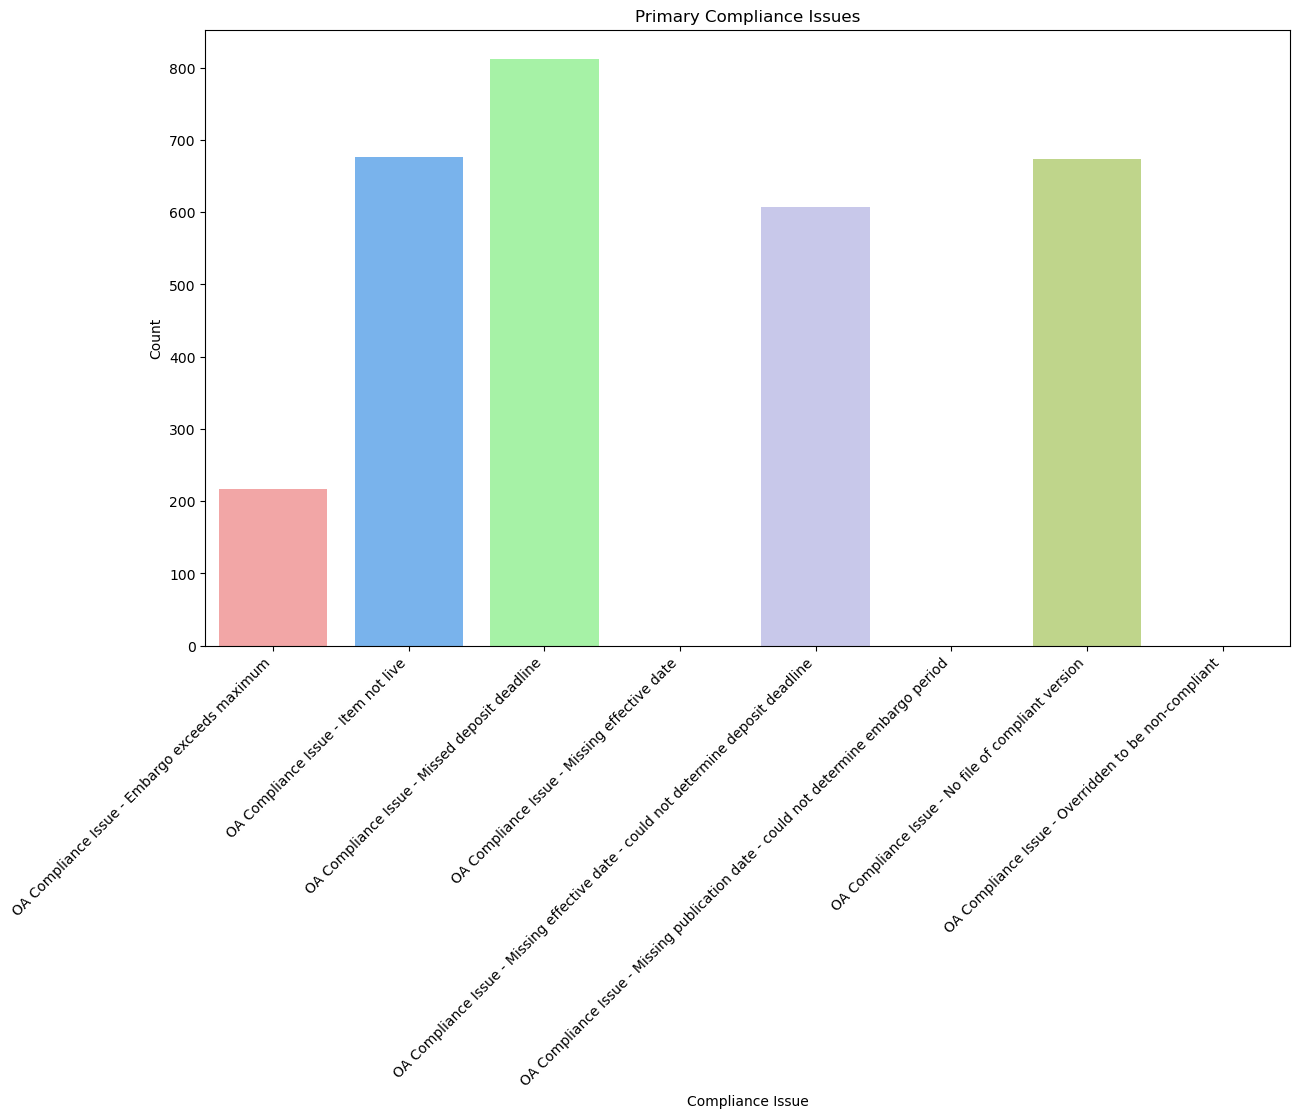

In [14]:
#Plot 8 - Primary Compliance issues
# List of compliance issue columns
compliance_issues = [
    'OA Compliance Issue - Embargo exceeds maximum',
    'OA Compliance Issue - Item not live',
    'OA Compliance Issue - Missed deposit deadline',
    'OA Compliance Issue - Missing effective date',
    'OA Compliance Issue - Missing effective date - could not determine deposit deadline',
    'OA Compliance Issue - Missing publication date - could not determine embargo period',
    'OA Compliance Issue - No file of compliant version',
    'OA Compliance Issue - Overridden to be non-compliant'
]

# Sum the occurrences of each compliance issue
issue_counts = df[compliance_issues].sum().reset_index()
issue_counts.columns = ['Compliance Issue', 'Count']

# Original colors
colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#c2c2f0', '#ffb3e6', '#c4e17f', '#76D7C4']

# Plotting the compliance issues as a vertical bar plot
plt.figure(figsize=(14, 8))
sns.barplot(data=issue_counts, x='Compliance Issue', y='Count', palette=colors)
plt.title('Primary Compliance Issues')
plt.xlabel('Compliance Issue')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

# Save the plot as an image file before showing it
plt.savefig('primary_compliance_issues.png', bbox_inches='tight')

plt.show()

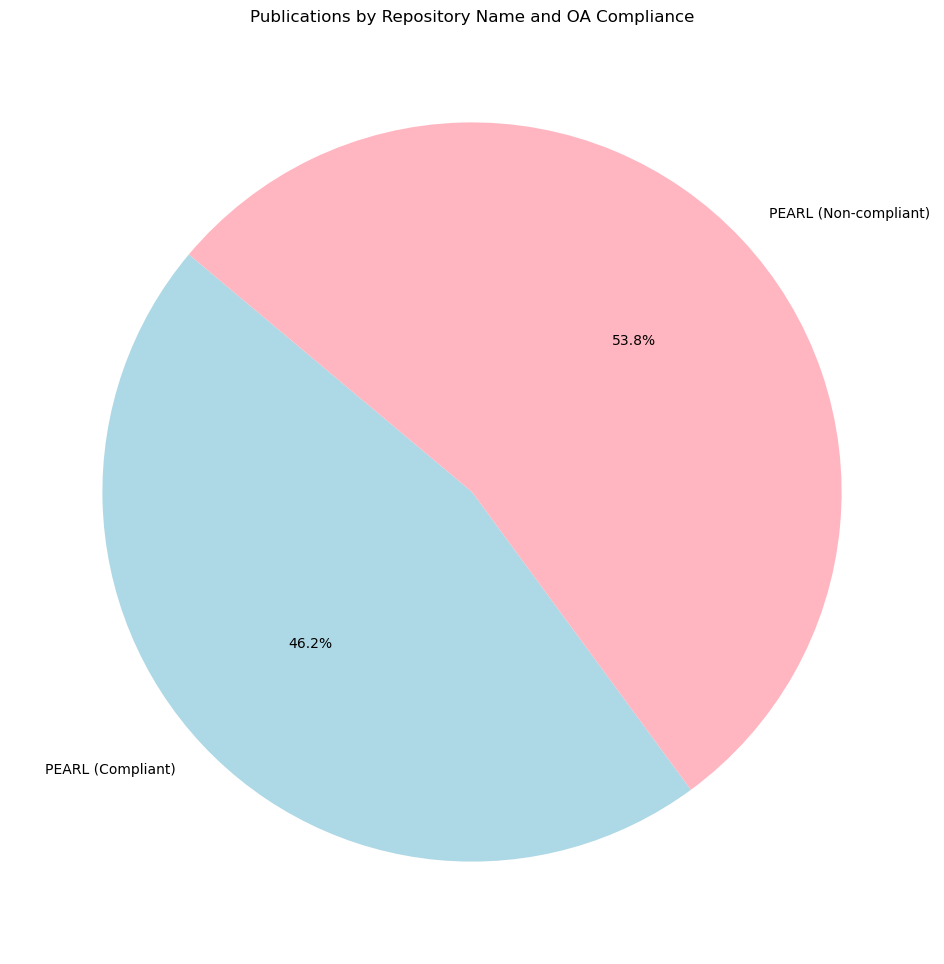

In [15]:
#Plot 9 - Repository Compliance Rate Plot
# Group by repository name and OA compliance status, then count occurrences
df_agg_repository = df.groupby(['Repository name', 'OA Compliance']).size().reset_index(name='Count')

# Pivot the data to get a summary for the pie chart
df_pivot = df_agg_repository.pivot(index='Repository name', columns='OA Compliance', values='Count').fillna(0)
df_pivot['Total'] = df_pivot.sum(axis=1)
df_pivot = df_pivot.sort_values(by='Total', ascending=False)

# Combine compliant and non-compliant data
compliance_data = df_pivot[['Compliant', 'Non-compliant']].stack().reset_index()
compliance_data.columns = ['Repository name', 'Compliance Status', 'Count']

# Create a list of colors
colors = []
for status in compliance_data['Compliance Status']:
    if status == 'Compliant':
        colors.append('lightblue')
    else:
        colors.append('lightpink')

# Generate the pie chart
plt.figure(figsize=(12, 12))
plt.pie(compliance_data['Count'], labels=compliance_data['Repository name'] + ' (' + compliance_data['Compliance Status'] + ')', 
        autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Publications by Repository Name and OA Compliance')

# Save the pie chart as an image
plt.savefig('publications_by_repository_and_compliance_status.png', bbox_inches='tight')

# Display the pie chart
plt.show()

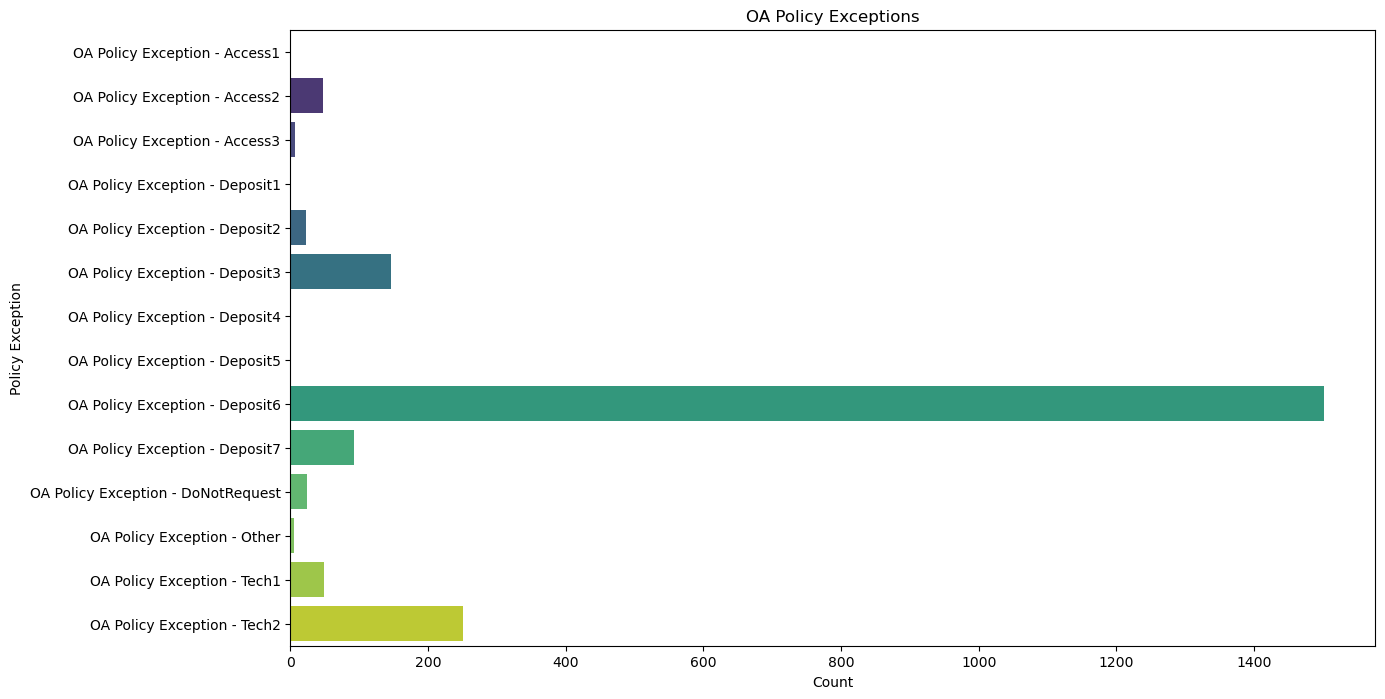

In [16]:
#Plot 10 - OA Policy exception chart
# List of OA Policy Exception columns
oa_policy_exceptions = [
    'OA Policy Exception - Access1',
    'OA Policy Exception - Access2',
    'OA Policy Exception - Access3',
    'OA Policy Exception - Deposit1',
    'OA Policy Exception - Deposit2',
    'OA Policy Exception - Deposit3',
    'OA Policy Exception - Deposit4',
    'OA Policy Exception - Deposit5',
    'OA Policy Exception - Deposit6',
    'OA Policy Exception - Deposit7',
    'OA Policy Exception - DoNotRequest',
    'OA Policy Exception - Other',
    'OA Policy Exception - Tech1',
    'OA Policy Exception - Tech2'
]

# Sum the occurrences of each OA policy exception
exception_counts = df[oa_policy_exceptions].sum().reset_index()
exception_counts.columns = ['Policy Exception', 'Count']

# Plotting the OA policy exceptions
plt.figure(figsize=(14, 8))
sns.barplot(data=exception_counts, x='Count', y='Policy Exception', palette='viridis')
plt.title('OA Policy Exceptions')
plt.xlabel('Count')
plt.ylabel('Policy Exception')

# Save the plot as an image
plt.savefig('oa_policy_exceptions.png')

# Display the plot
plt.show()

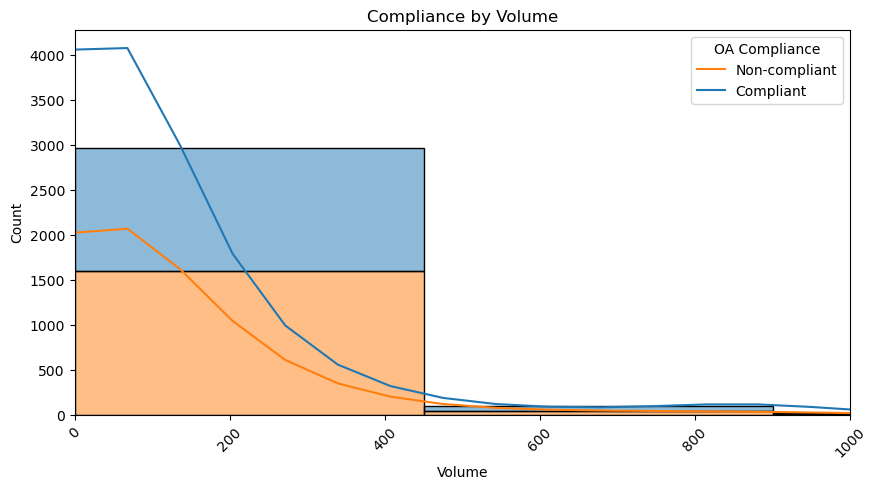

In [17]:
#Plot 11 - Compliance by Volume
# Plotting Compliance by Volume
plt.figure(figsize=(10, 5))
ax = sns.histplot(data=df, x='volume', hue='OA Compliance', multiple='stack', bins=30, kde=True)
plt.title('Compliance by Volume')
plt.xlabel('Volume')
plt.ylabel('Count')
plt.xlim(0, 1000)  # Limiting the x-axis to 1000 for better visualization
plt.xticks(rotation=45)
ax.legend(title='OA Compliance', labels=['Non-compliant', 'Compliant'])

# Save the plot as an image file
plt.savefig('compliance_by_volume.png')

# Show the plot
plt.show()

                           volume  publication-date  First Deposit Date  \
volume                   1.000000         -0.064748            0.007317   
publication-date        -0.064748          1.000000            0.075764   
First Deposit Date       0.007317          0.075764            1.000000   
online-publication-date -0.010250          0.334366            0.175889   
OA Compliance Numeric   -0.021173          0.114787           -0.113678   

                         online-publication-date  OA Compliance Numeric  
volume                                 -0.010250              -0.021173  
publication-date                        0.334366               0.114787  
First Deposit Date                      0.175889              -0.113678  
online-publication-date                 1.000000               0.048069  
OA Compliance Numeric                   0.048069               1.000000  


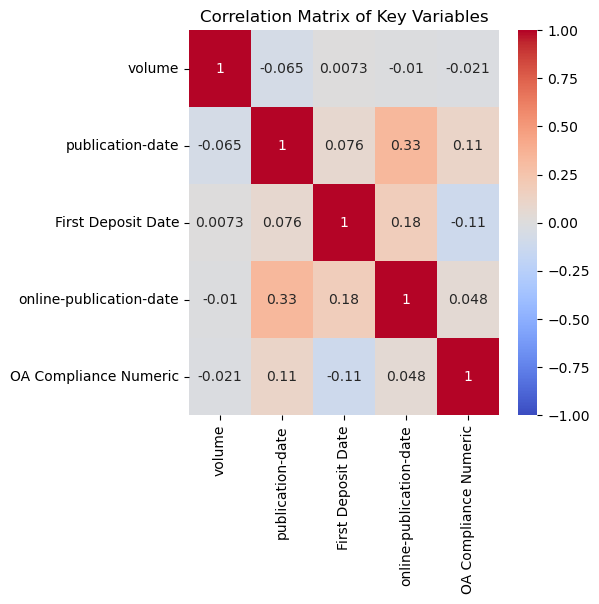

In [18]:
#Correlation Analysis

# Convert 'OA Compliance' to binary numeric format
df['OA Compliance Numeric'] = df['OA Compliance'].apply(lambda x: 1 if x == 'Compliant' else 0)

# Select relevant columns for correlation analysis
correlation_columns = ['volume', 'publication-date', 'First Deposit Date', 'online-publication-date', 'OA Compliance Numeric']

# Compute the correlation matrix
correlation_matrix = df[correlation_columns].corr()

# Display the correlation matrix
print(correlation_matrix)

#Visualize the Correlation Matrix
plt.figure(figsize=(5, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Key Variables')

# Save the heatmap
plt.savefig('correlation_matrix_heatmap.png')

plt.show()

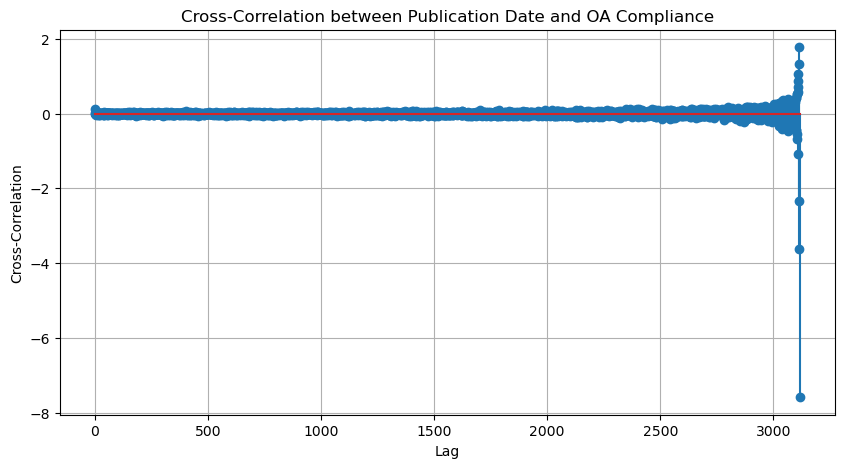

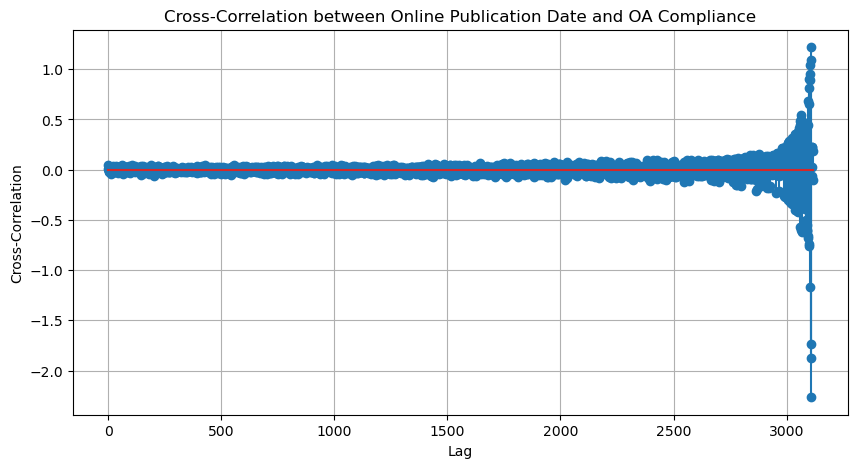

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import ccf

# Convert 'publication-date' and 'online-publication-date' to ordinal numbers (days since 1/1/1)
df['publication_date_ordinal'] = pd.to_datetime(df['publication-date']).apply(lambda date: date.toordinal())
df['online_publication_date_ordinal'] = pd.to_datetime(df['online-publication-date']).apply(lambda date: date.toordinal())

# Compute cross-correlation between 'publication_date_ordinal' and 'OA Compliance Numeric'
cross_corr_pub_date = ccf(df['publication_date_ordinal'], df['OA Compliance Numeric'])
cross_corr_online_pub_date = ccf(df['online_publication_date_ordinal'], df['OA Compliance Numeric'])

# Plot cross-correlation for publication-date vs. OA Compliance
plt.figure(figsize=(10, 5))
plt.stem(cross_corr_pub_date)  # Removed 'use_line_collection=True'
plt.title('Cross-Correlation between Publication Date and OA Compliance')
plt.xlabel('Lag')
plt.ylabel('Cross-Correlation')
plt.grid(True)
plt.show()

# Plot cross-correlation for online-publication-date vs. OA Compliance
plt.figure(figsize=(10, 5))
plt.stem(cross_corr_online_pub_date)  # Removed 'use_line_collection=True'
plt.title('Cross-Correlation between Online Publication Date and OA Compliance')
plt.xlabel('Lag')
plt.ylabel('Cross-Correlation')
plt.grid(True)
plt.show()


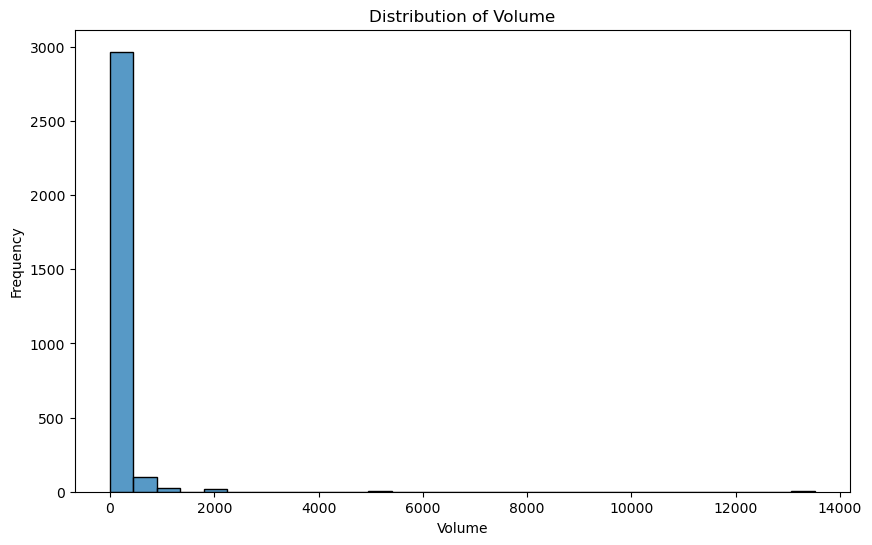

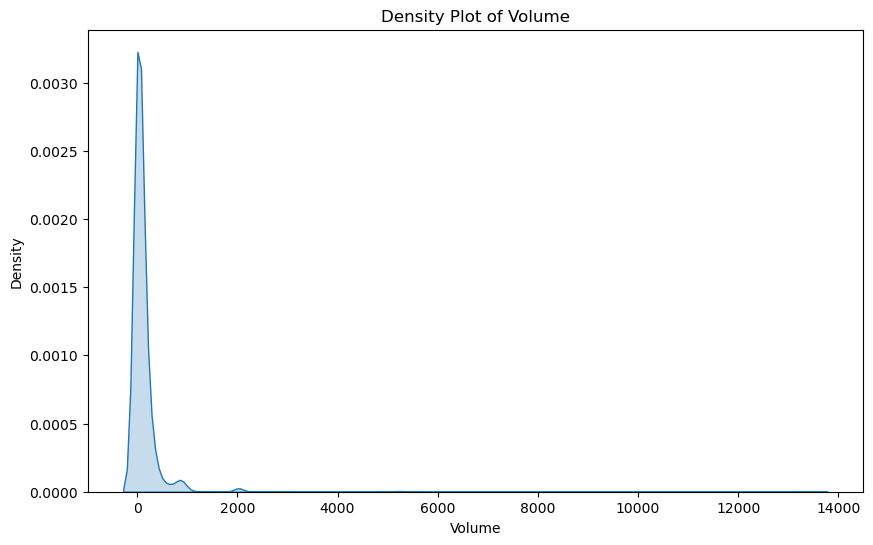

In [20]:
#Distribution Patterns
#Plot a histogram for volume
plt.figure(figsize=(10, 6))
sns.histplot(df['volume'], bins=30, kde=False)
plt.title('Distribution of Volume')
plt.xlabel('Volume')
plt.ylabel('Frequency')

# Save the plot
plt.savefig('volume_distribution_histogram.png')

plt.show()

# Plot a density plot for volume
plt.figure(figsize=(10, 6))
sns.kdeplot(df['volume'], fill=True)
plt.title('Density Plot of Volume')
plt.xlabel('Volume')
plt.ylabel('Density')

# Save the plot
plt.savefig('volume_density_plot.png')

plt.show()

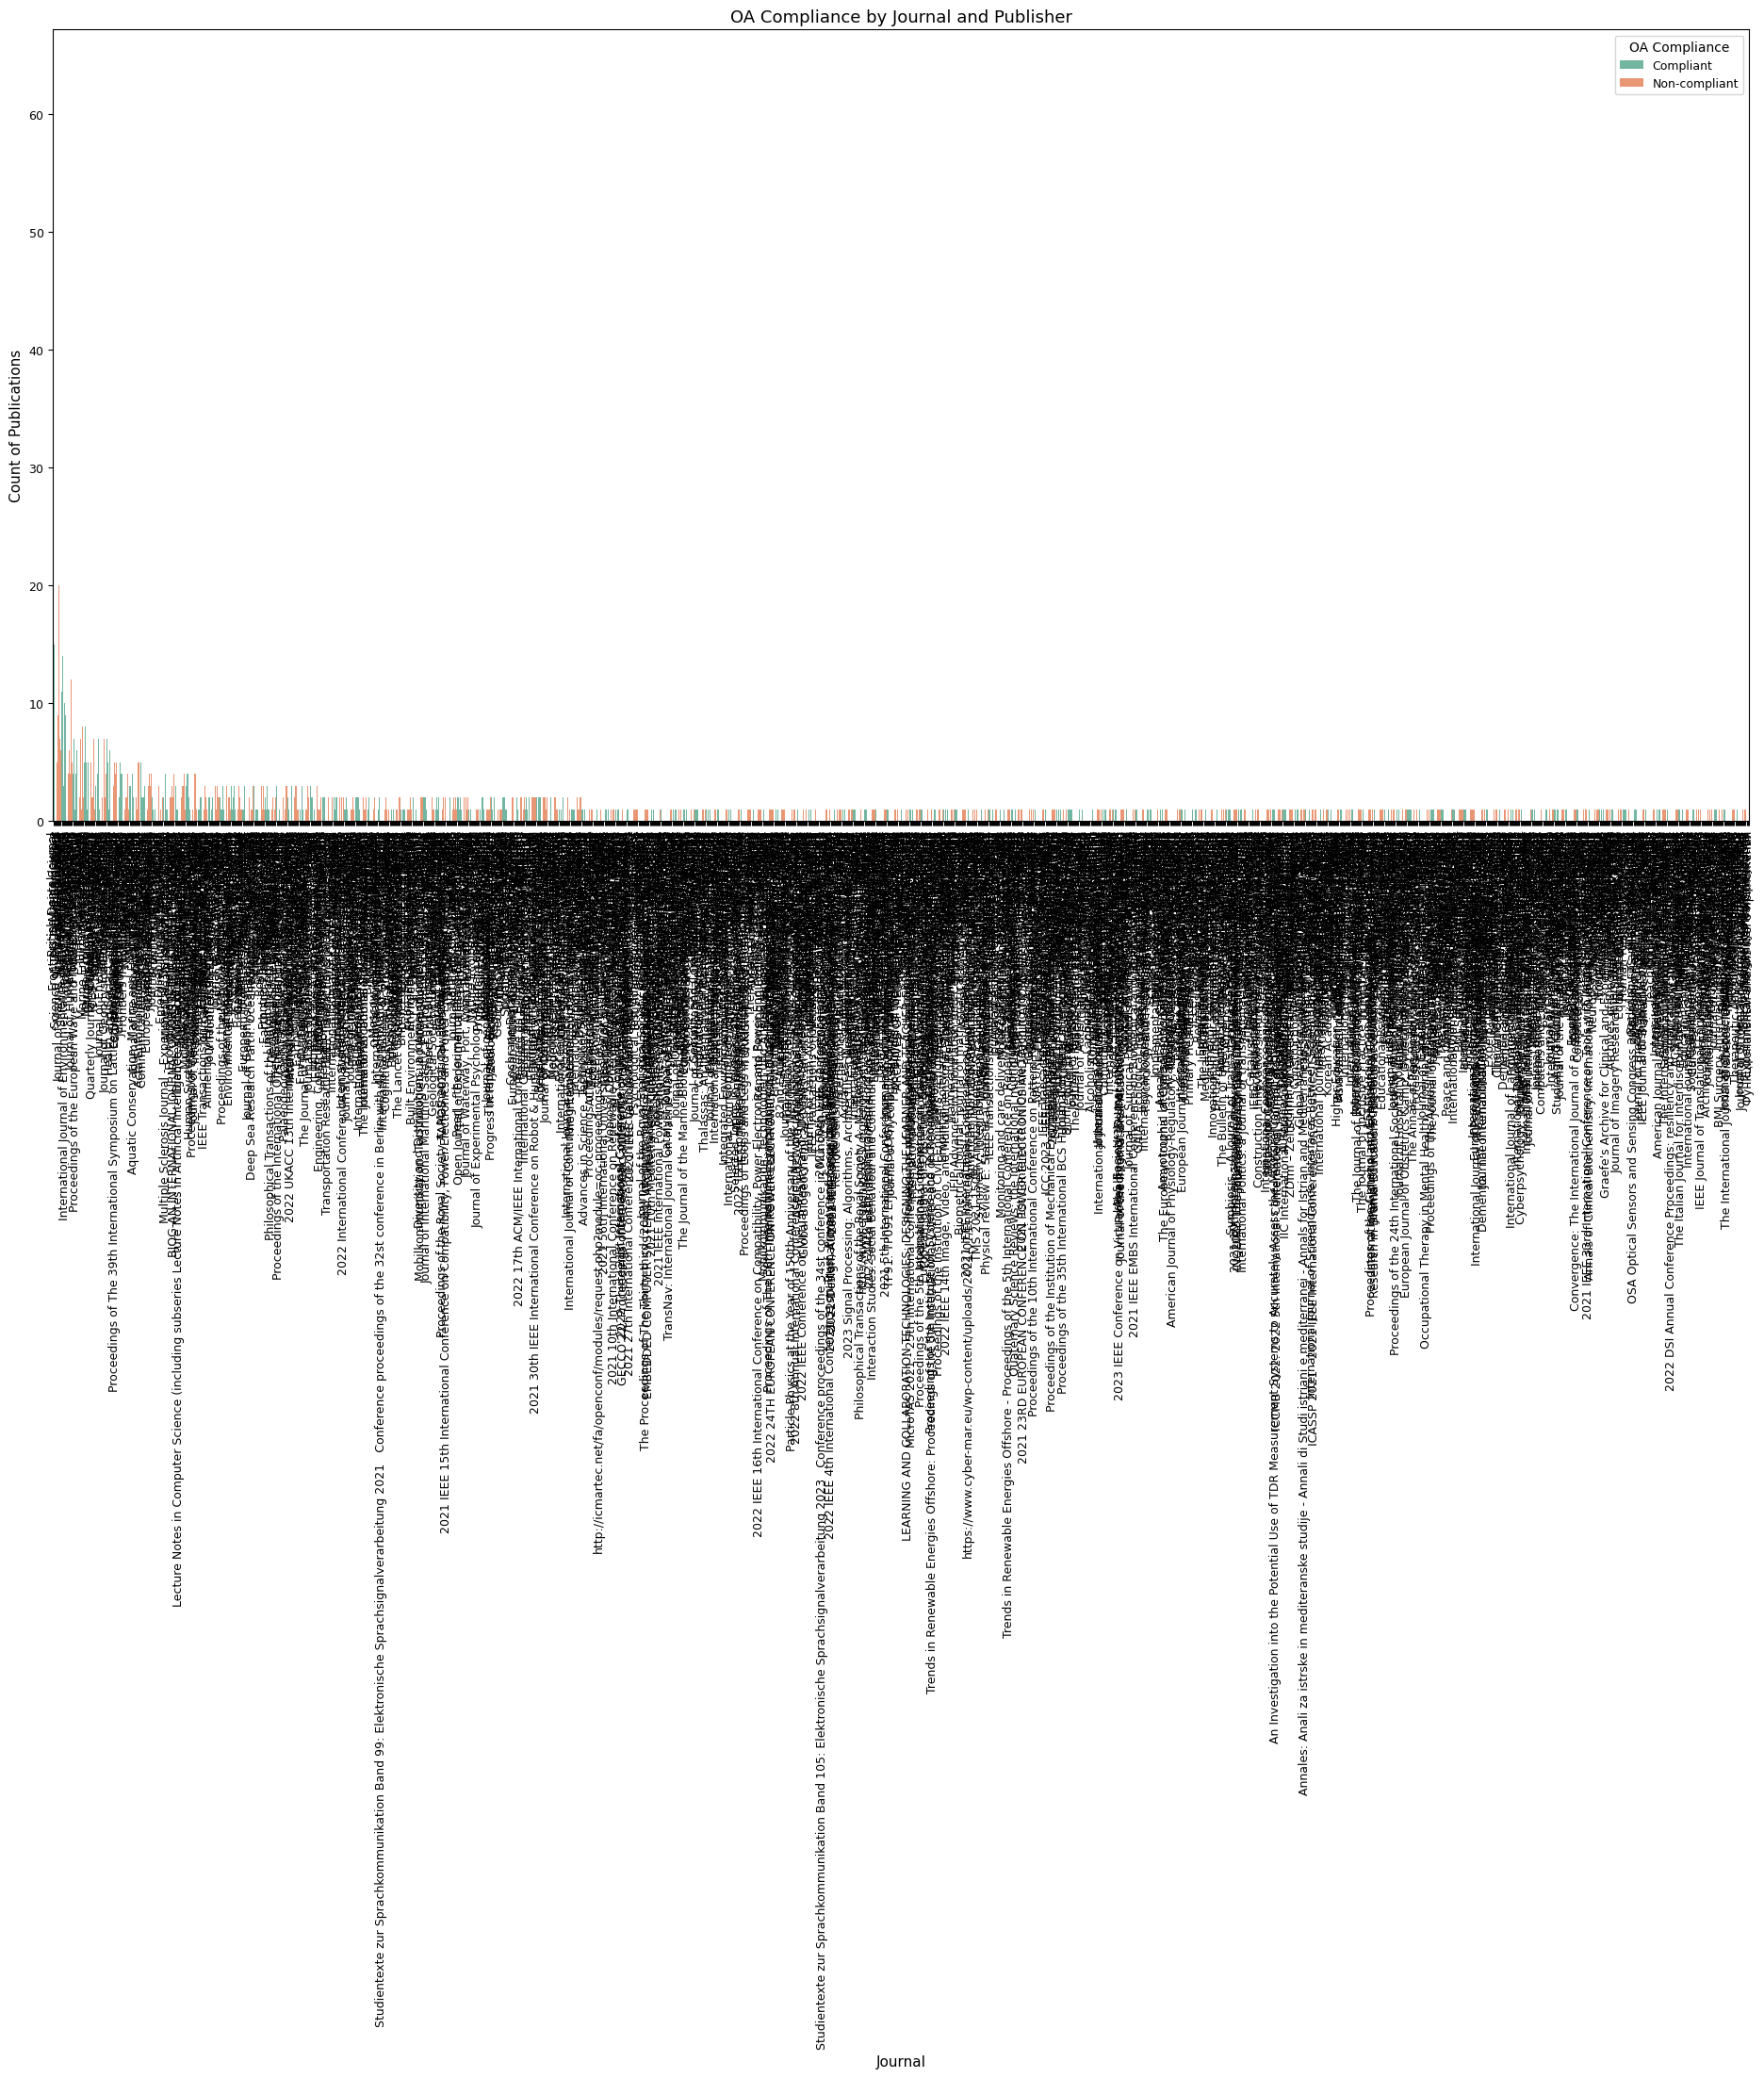

In [21]:
#plot 12 
# Set up the figure size
plt.figure(figsize=(20, 14))  # Further increased figure size

# Create the plot
sns.countplot(
    data=df,
    x='journal',
    hue='OA Compliance',
    order=df['journal'].value_counts().index,  # Order journals by frequency
    palette='Set2'
)

# Customize the plot
plt.xticks(rotation=90, fontsize=9)  # Rotate x-axis labels, slightly reduced font size
plt.yticks(fontsize=9)  # Adjust y-axis label size
plt.title('OA Compliance by Journal and Publisher', fontsize=13)  # Title with adjusted font size
plt.xlabel('Journal', fontsize=11)  # Adjust x-axis label size
plt.ylabel('Count of Publications', fontsize=11)  # Adjust y-axis label size
plt.legend(title='OA Compliance', fontsize=9)  # Adjust legend font size

# Manually adjust the margins
plt.subplots_adjust(left=0.05, right=0.95, top=0.85, bottom=0.25)

# Save the plot
plt.savefig('OA_Compliance_by_Journal_and_Publisher.png')

# Show the plot
plt.show()

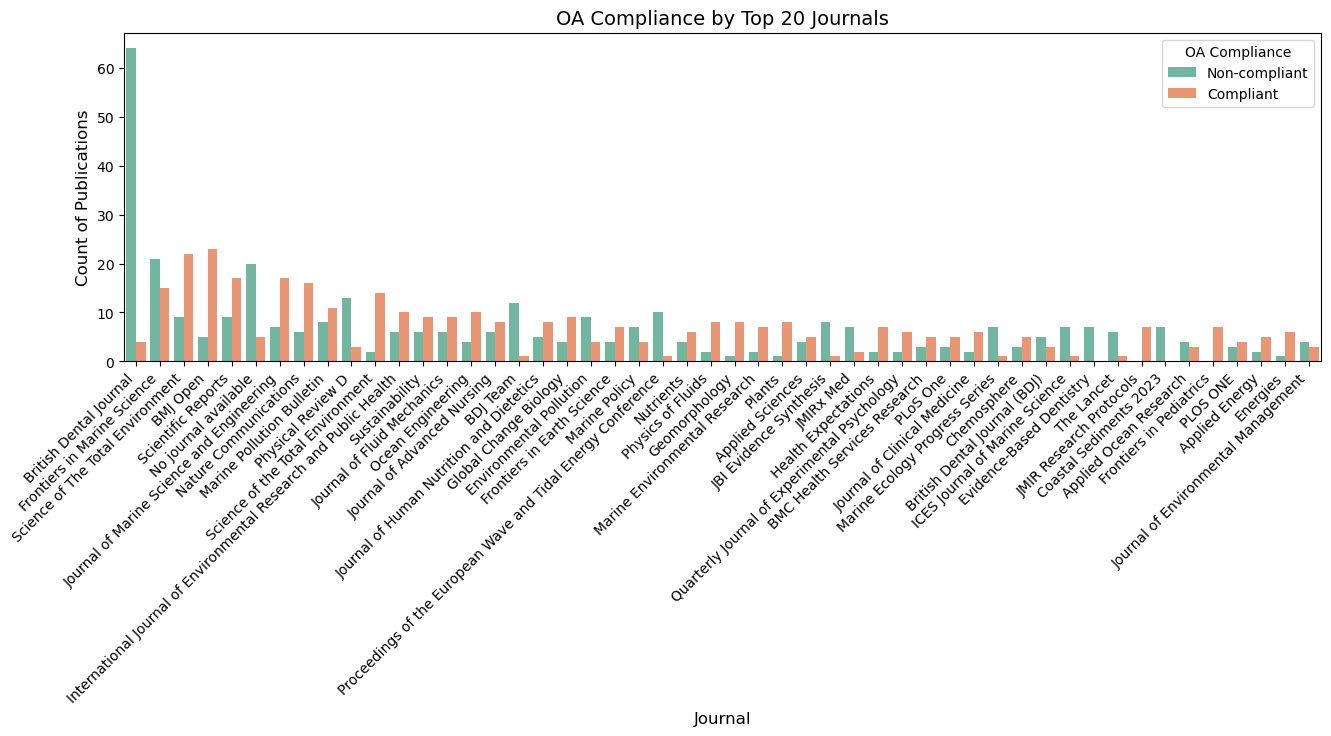

In [22]:
# Calculate the top 50 journals by frequency
top_journals = df['journal'].value_counts().nlargest(50).index

# Filter the DataFrame to include only the top 50 journals
filtered_df = df[df['journal'].isin(top_journals)]

# Set up the figure size
plt.figure(figsize=(14, 8))  # Adjusted figure size for better clarity

# Create the plot for the top 50 journals
sns.countplot(
    data=filtered_df,
    x='journal',
    hue='OA Compliance',
    order=filtered_df['journal'].value_counts().index,
    palette='Set2'
)

# Customize the plot
plt.xticks(rotation=45, ha='right', fontsize=10)  # Rotate x-axis labels for readability
plt.yticks(fontsize=10)  # Adjust y-axis label size
plt.title('OA Compliance by Top 20 Journals', fontsize=14)  # Title with adjusted font size
plt.xlabel('Journal', fontsize=12)  # Adjust x-axis label size
plt.ylabel('Count of Publications', fontsize=12)  # Adjust y-axis label size
plt.legend(title='OA Compliance', fontsize=10)  # Adjust legend font size

# Adjust the layout for better spacing
plt.tight_layout(pad=3.0)

# Save the plot
plt.savefig('OA_Compliance_by_Top_50_Journals.png')

# Show the plot
plt.show()

In [23]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.utils.class_weight import compute_class_weight

# Convert datetime columns to year if they exist
if 'First Deposit Date' in df.columns:
    df['First Deposit Year'] = pd.to_datetime(df['First Deposit Date']).dt.year
if 'acceptance-date' in df.columns:
    df['Acceptance Year'] = pd.to_datetime(df['acceptance-date']).dt.year

# Update the features list to use the newly created year columns
features = ['Publication Type', 'journal', 'volume', 'publisher', 'First Deposit Year', 'Acceptance Year']

# Encode categorical variables
label_encoders = {}
for column in features:
    if df[column].dtype == 'object':
        label_encoders[column] = LabelEncoder()
        df[column] = label_encoders[column].fit_transform(df[column])

# Encode the target variable
target = 'OA Compliance'
label_encoders[target] = LabelEncoder()
df[target] = label_encoders[target].fit_transform(df[target])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], test_size=0.3, random_state=42)

# Check the data
print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)

# Train the Logistic Regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predict on the test data
y_pred = model.predict(X_test)

# Manually map 0 and 1 to "Non-compliant" and "Compliant" respectively
mapping = {0: 'Non-compliant', 1: 'Compliant'}
y_test_decoded = [mapping[label] for label in y_test]
y_pred_decoded = [mapping[label] for label in y_pred]

print("")
# Evaluate the model using the mapped labels
print("Logisitic Regression Classification Report:")
print(classification_report(y_test_decoded, y_pred_decoded, target_names=['Non-compliant', 'Compliant']))

# Add a constant for statsmodels
X_train_const = sm.add_constant(X_train)
log_reg_model = sm.Logit(y_train, X_train_const).fit()
print(log_reg_model.summary())

vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif["Feature"] = X_train.columns
print(vif)

print("")
influence = log_reg_model.get_influence()
(cooks_d, p_value) = influence.cooks_distance
print(cooks_d)

print("")
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
print(class_weights)


Training data shape: (2181, 6)
Testing data shape: (936, 6)

Logisitic Regression Classification Report:
               precision    recall  f1-score   support

Non-compliant       0.72      0.53      0.61       515
    Compliant       0.57      0.75      0.65       421

     accuracy                           0.63       936
    macro avg       0.64      0.64      0.63       936
 weighted avg       0.65      0.63      0.63       936

Optimization terminated successfully.
         Current function value: 0.649706
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:          OA Compliance   No. Observations:                 2181
Model:                          Logit   Df Residuals:                     2174
Method:                           MLE   Df Model:                            6
Date:                Sun, 08 Sep 2024   Pseudo R-squ.:                 0.05975
Time:                        06:04:52   Log-Likelihood:          

Decision Tree Classification Report:
               precision    recall  f1-score   support

Non-compliant       0.68      0.76      0.71       515
    Compliant       0.65      0.56      0.60       421

     accuracy                           0.67       936
    macro avg       0.66      0.66      0.66       936
 weighted avg       0.66      0.67      0.66       936



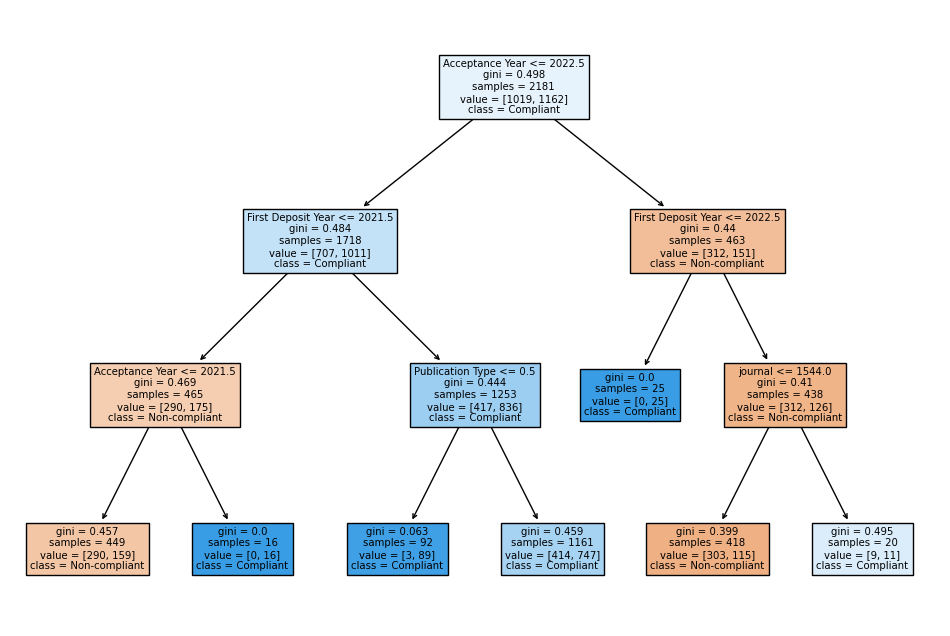

In [24]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

# Define the features used in Model 1
features = ['Publication Type', 'journal', 'volume', 'publisher', 'First Deposit Year', 'Acceptance Year']

# Mapping labels
mapping = {0: 'Non-compliant', 1: 'Compliant'}

# Train a simple Decision Tree model
tree_model = DecisionTreeClassifier(max_depth=3, random_state=42)
tree_model.fit(X_train, y_train)

# Predict on the test data
y_pred_tree = tree_model.predict(X_test)

# Map the predictions and true labels to their string representations
y_pred_tree_mapped = [mapping[label] for label in y_pred_tree]
y_test_mapped = [mapping[label] for label in y_test]

# Evaluate the model
print("Decision Tree Classification Report:")
print(classification_report(y_test_mapped, y_pred_tree_mapped, target_names=['Non-compliant', 'Compliant']))

# Visualize the tree with correct labels
plt.figure(figsize=(12, 8))
plot_tree(tree_model, filled=True, feature_names=features, class_names=['Non-compliant', 'Compliant'])
plt.show()


In [25]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier  # Import this for RandomForestClassifier
from sklearn.metrics import classification_report

# Feature Engineering: Create new features if the columns exist
if 'First Deposit Date' in df.columns:
    df['First Deposit Year'] = pd.to_datetime(df['First Deposit Date']).dt.year
if 'acceptance-date' in df.columns:
    df['Acceptance Year'] = pd.to_datetime(df['acceptance-date']).dt.year
if 'publication-date' in df.columns:
    df['Publication Year'] = pd.to_datetime(df['publication-date']).dt.year

# Feature: Time between Acceptance Date and Publication Date
if 'Acceptance Year' in df.columns and 'Publication Year' in df.columns:
    df['Time Between Acceptance and Publication'] = df['Publication Year'] - df['Acceptance Year']

# Feature: Count of Compliance Issues
compliance_issue_cols = [col for col in df.columns if 'OA Compliance Issue' in col]
df['Compliance Issue Count'] = df[compliance_issue_cols].sum(axis=1)

# Drop the original datetime columns if they exist
# columns_to_drop = []
# if 'First Deposit Date' in df.columns:
    # columns_to_drop.append('First Deposit Date')
# if 'acceptance-date' in df.columns:
    # columns_to_drop.append('acceptance-date')
# if 'publication-date' in df.columns:
    # columns_to_drop.append('publication-date')

# if columns_to_drop:
    # df = df.drop(columns=columns_to_drop)

# Update the features list to include the new features
features = ['Publication Type', 'journal', 'volume', 'publisher', 
            'First Deposit Year', 'Acceptance Year', 
            'Publication Year', 'Time Between Acceptance and Publication', 'Compliance Issue Count']
target = 'OA Compliance'

# Encode categorical variables
label_encoders = {}
for column in features:
    if df[column].dtype == 'object':
        label_encoders[column] = LabelEncoder()
        df[column] = label_encoders[column].fit_transform(df[column])

# Encode the target variable
label_encoders[target] = LabelEncoder()
df[target] = label_encoders[target].fit_transform(df[target])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], test_size=0.3, random_state=42)

# Train the Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Set up the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Perform Grid Search with Cross-Validation
grid_search = GridSearchCV(rf_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best model from Grid Search
best_rf_model = grid_search.best_estimator_

# Predict on the test data
y_pred_rf = best_rf_model.predict(X_test)

# Evaluate the model
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       421
           1       1.00      1.00      1.00       515

    accuracy                           1.00       936
   macro avg       1.00      1.00      1.00       936
weighted avg       1.00      1.00      1.00       936



Cross-Validation Scores: [0.6819222  0.7087156  0.68807339 0.63302752 0.69954128]
Mean CV Accuracy: 0.6822559989922953
Random Forest Classification Report:
               precision    recall  f1-score   support

Non-compliant       0.69      0.73      0.71       515
    Compliant       0.65      0.61      0.63       421

     accuracy                           0.67       936
    macro avg       0.67      0.67      0.67       936
 weighted avg       0.67      0.67      0.67       936



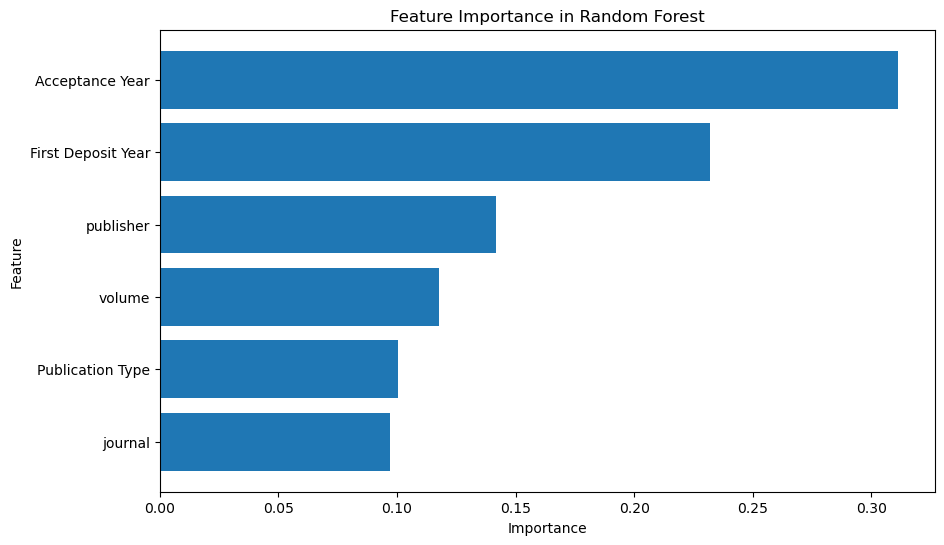

In [26]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

# Expanded feature set - including more relevant features
features_expanded = ['Publication Type', 'journal', 'First Deposit Year', 'Acceptance Year', 'volume', 'publisher']  # Add more features
target = 'OA Compliance'

# Encode categorical variables
label_encoders = {}
for column in features_expanded:
    if df[column].dtype == 'object':
        label_encoders[column] = LabelEncoder()
        df[column] = label_encoders[column].fit_transform(df[column])

# Encode the target variable
label_encoders[target] = LabelEncoder()
df[target] = label_encoders[target].fit_transform(df[target])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df[features_expanded], df[target], test_size=0.3, random_state=42)

# Updated Random Forest model with more trees and deeper depth
rf_model = RandomForestClassifier(
    n_estimators=100,          # Increased number of trees
    max_depth=5,               # Deeper trees for more complex relationships
    min_samples_split=10,      # Require more samples to split
    min_samples_leaf=5,        # Require more samples at leaf nodes
    max_features='sqrt',       # Consider sqrt of total features at each split
    random_state=42
)

# Perform cross-validation to assess overfitting
cv_scores = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='accuracy')
print(f"Cross-Validation Scores: {cv_scores}")
print(f"Mean CV Accuracy: {cv_scores.mean()}")

# Fit the model
rf_model.fit(X_train, y_train)

# Predict on the test data
y_pred_rf = rf_model.predict(X_test)

# Manually map 0 and 1 to "Non-compliant" and "Compliant" respectively
mapping = {0: 'Non-compliant', 1: 'Compliant'}
y_test_decoded = [mapping[label] for label in y_test]
y_pred_rf_decoded = [mapping[label] for label in y_pred_rf]

# Evaluate the model using the mapped labels
print("Random Forest Classification Report:")
print(classification_report(y_test_decoded, y_pred_rf_decoded, target_names=['Non-compliant', 'Compliant']))

# Feature importance plot
importances = rf_model.feature_importances_
feature_importance_df = pd.DataFrame({'feature': features_expanded, 'importance': importances})

# Sort by importance
feature_importance_df = feature_importance_df.sort_values(by='importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['feature'], feature_importance_df['importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance in Random Forest')
plt.gca().invert_yaxis()
plt.show()


In [27]:
from sklearn.preprocessing import PolynomialFeatures

# Adding polynomial features
poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# New feature names after adding interaction terms
poly_features = poly.get_feature_names_out(features_expanded)

# Refit the Random Forest or other models with the expanded feature set
rf_model_poly = RandomForestClassifier(
    n_estimators=100,
    max_depth=5,
    min_samples_split=10,
    min_samples_leaf=5,
    max_features='sqrt',
    random_state=42
)

rf_model_poly.fit(X_train_poly, y_train)

# Evaluate performance on the test set
y_pred_rf_poly = rf_model_poly.predict(X_test_poly)
print("Updated Random Forest with Feature Engineering:")
print(classification_report(y_test, y_pred_rf_poly, target_names=['Non-compliant', 'Compliant']))


Updated Random Forest with Feature Engineering:
               precision    recall  f1-score   support

Non-compliant       0.65      0.59      0.62       421
    Compliant       0.69      0.74      0.71       515

     accuracy                           0.67       936
    macro avg       0.67      0.66      0.66       936
 weighted avg       0.67      0.67      0.67       936



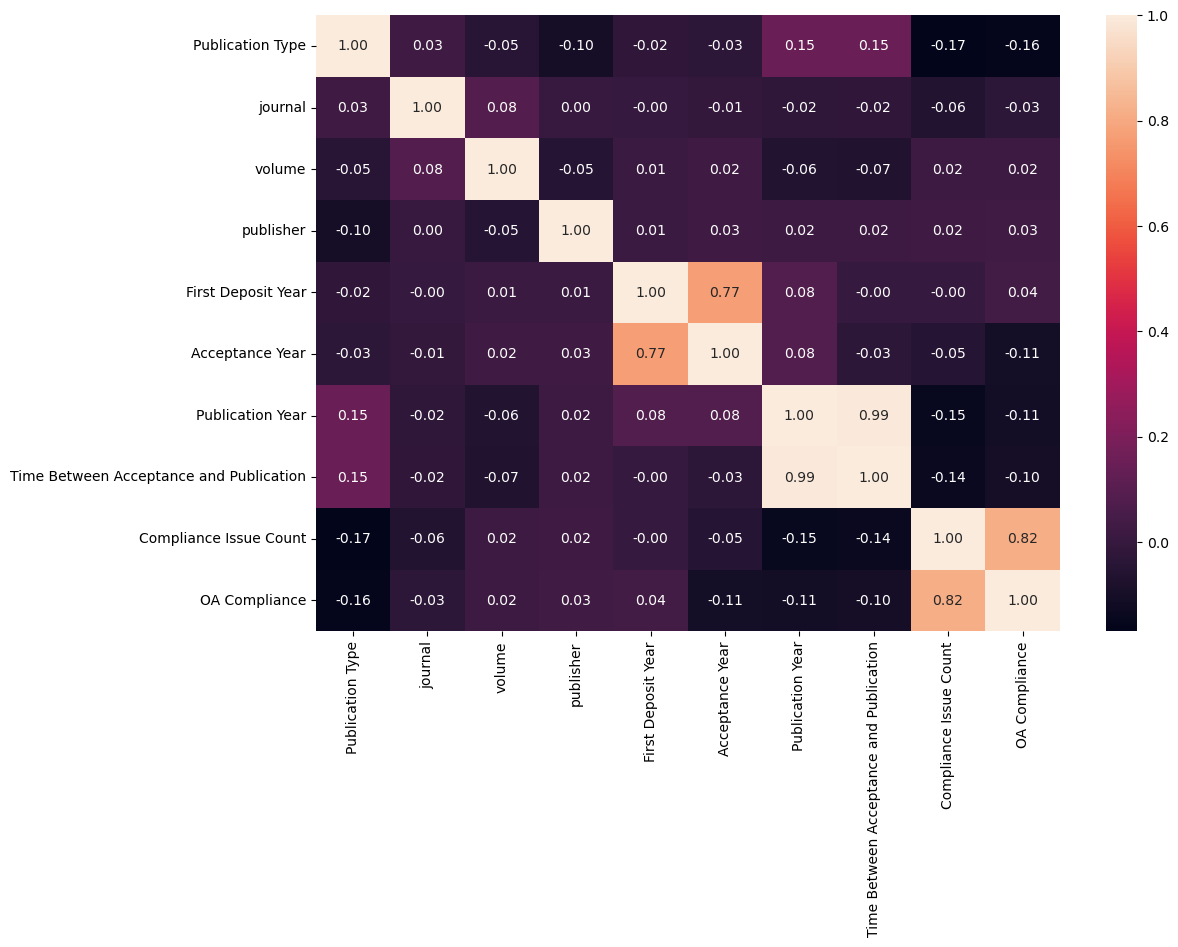

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
corr_matrix = df[features + [target]].corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f")

# Save the plot
plt.savefig('Correlation Matrix')

plt.show()


In [29]:
from sklearn.neural_network import MLPClassifier

# Neural Network (Multilayer Perceptron)
mlp_model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=42)

# Fit the model
mlp_model.fit(X_train, y_train)

# Predict and evaluate the model
y_pred_mlp = mlp_model.predict(X_test)
print("Neural Network (MLP) Model:")
print(classification_report(y_test, y_pred_mlp, target_names=['Non-compliant', 'Compliant']))


Neural Network (MLP) Model:
               precision    recall  f1-score   support

Non-compliant       0.46      0.96      0.62       421
    Compliant       0.73      0.10      0.17       515

     accuracy                           0.48       936
    macro avg       0.60      0.53      0.40       936
 weighted avg       0.61      0.48      0.37       936

